In [3]:
import argparse
import model as M
import nnue_dataset
import pytorch_lightning as pl
import features
import os
import sys
import torch
from torch import set_num_threads as t_set_num_threads
from pytorch_lightning import loggers as pl_loggers
from torch.utils.data import DataLoader, Dataset

In [ ]:
python train.py --smart-fen-skipping --random-fen-skipping 4 --train-setting $train_setting \
--batch-size 16384 --threads 2 --num-workers 32 --gpus 1 \
--network-save-period 100 --validation-size 100 \
training_data.binpack training_data.binpack

In [4]:
feature_set = features.get_feature_set_from_name('HalfKAv2_hm^')



nnue = M.NNUE(
      feature_set=feature_set,
      start_lambda=1,
      max_epoch=500,
      end_lambda=1,
      gamma=0.992,
      lr=8.75e-4,
      param_index=0
    )

In [36]:
trainer = pl.Trainer()

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ap/nnue-pytorch/venv/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
/home/ap/nnue-pytorch/venv/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:67: UserWarning: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
  warning_cache.warn(


In [44]:
trainer.predict(nnue)

ValueError: An invalid dataloader was passed to `Trainer.predict(dataloaders=...)`. Either pass the dataloader to the `.predict()` method OR implement `def predict_dataloader(self):` in your LightningModule/LightningDataModule.

In [46]:
trainer.save_checkpoint('untrained.ckpt')

In [38]:
checkpoint_callback = pl.callbacks.ModelCheckpoint()

In [40]:
checkpoint_callback.save_checkpoint(nnue)

NotImplementedError: `ModelCheckpoint.save_checkpoint()` was deprecated in v1.6 and is no longer supported as of 1.8. Please use `trainer.save_checkpoint()` to manually save a checkpoint.

In [37]:
nnue.save_pretrained('asdf')

AttributeError: 'NNUE' object has no attribute 'save_pretrained'

In [35]:
torch.save(nnue, 'untrained_model.ckpt')

In [34]:
nnue.save_checkpoint('test.ckpt')

AttributeError: 'NNUE' object has no attribute 'save_checkpoint'

In [ ]:
model = MyLightningModule(hparams)
trainer.fit(model)
trainer.save_checkpoint("example.ckpt")

In [11]:
import matplotlib.pyplot as plt

input_weight = nnue.input.weight.detach().numpy()
input_weight.shape

(23296, 1032)

In [19]:
nnue.feature_set.get_virtual_feature_ranges()

[(22528, 23296)]

In [22]:
nnue.feature_set.get_initial_psqt_features()[0] / nnue.nnue2score

0.21

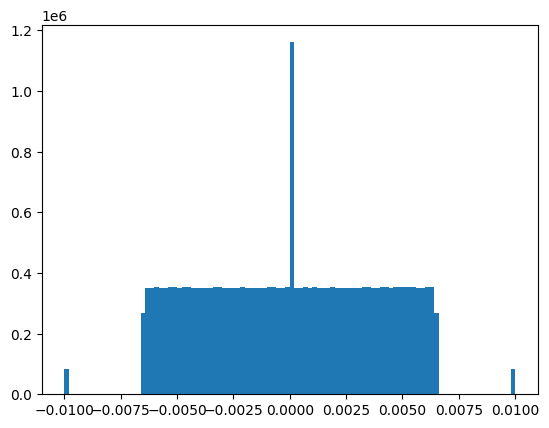

In [27]:
plt.hist(input_weight[:,:].flatten().clip(-0.01,0.01), bins = 100)
plt.show()

In [30]:
import math
from torch import nn
num_inputs = feature_set.num_features
num_outputs = 1024 + 8
sigma = math.sqrt(1/num_inputs)
sim_weights = nn.Parameter(torch.rand(num_inputs, num_outputs, dtype=torch.float32) * (2 * sigma) - sigma)

In [33]:
sigma

0.006551780229511989

(array([2401928., 2404232., 2403016., 2405778., 2402782., 2406155.,
        2406016., 2404169., 2403258., 2404138.]),
 array([-6.55178027e-03, -5.24142431e-03, -3.93106835e-03, -2.62071239e-03,
        -1.31035643e-03, -4.65661287e-10,  1.31035550e-03,  2.62071146e-03,
         3.93106742e-03,  5.24142338e-03,  6.55177934e-03]),
 <BarContainer object of 10 artists>)

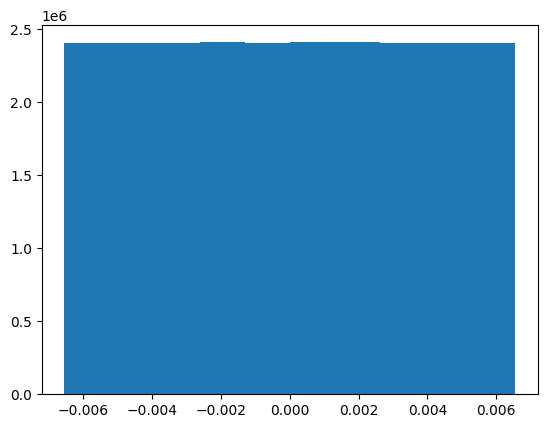

In [32]:
plt.hist(sim_weights.detach().numpy().flatten())